<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [41]:
import pandas as pd
import unicodedata
import random
from train import training
from util import load_data, evaluate, decaying

In [42]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/final_list1.csv', encoding = 'utf8')
df[df.columns[0]] = (df[df.columns[0]].map(lambda x: unicodedata.normalize('NFKD', str(x))))
print(df.shape)
df.head()
# change to dataframe to Spacy format
df['tuples'] = df.apply(lambda row: (row[df.columns[0]],row[df.columns[1]]), axis=1)
train =df['tuples'].tolist()

(40944, 2)


In [43]:
df['Sentence_length'] = df['Statements'].astype(str).apply(len)
df['word_count'] = df['Statements'].apply(lambda x: len(str(x).split()))

In [44]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Sentence_length',
    linecolor='black',
    yTitle='word_count',
    title='Text Length Distribution')

In [3]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df1 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/Citation_needed_wiki.csv', encoding = 'ISO-8859-1')
df1[df1.columns[0]] = (df1[df1.columns[0]].map(lambda x: unicodedata.normalize('NFKD', str(x))))
print(df1.shape)

# change to dataframe to Spacy format
df1['tuples'] = df1.apply(lambda row: (row[df1.columns[0]],row[df1.columns[1]]), axis=1)
test1 =df1['tuples'].tolist()
random.shuffle(test1)

test_texts1, test_cats1 = zip(*test1[:8000])
test_cats1 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats1]
test_data1 = list(zip(test_texts1,[{'cats': cats} for cats in test_cats1]))

(19998, 2)


In [4]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df2 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/wiki_data_test.csv', encoding = 'ISO-8859-1')
df2[df2.columns[0]] = (df2[df2.columns[0]].map(lambda x: unicodedata.normalize('NFKD', str(x))))
print(df2.shape)

# change to dataframe to Spacy format
df2['tuples'] = df2.apply(lambda row: (row[df2.columns[0]],row[df2.columns[1]]), axis=1)
test2 =df2['tuples'].tolist()
random.shuffle(test2)

test_texts2, test_cats2 = zip(*test2[:8000])
test_cats2 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats2]
test_data2 = list(zip(test_texts2,[{'cats': cats} for cats in test_cats2]))

(19980, 2)


In [5]:
import random

def load_data(limit=0, split=0.8):
    train_data=train
    # Shuffle the data
    
    random.shuffle(train_data)
    texts, labels = zip(*train_data)
    # get the categories for each review
    cats = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in labels]

    # Splitting the training and evaluation data
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

n_texts=23486

# Calling the load_data() function 
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)

#(test_texts, test_cats), (tev_texts, devt_cats) = load_data(limit=n_texts)
# Processing the final format of training data
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
train_data[:10]
dev_data = list(zip(dev_texts,[{'cats': cats} for cats in dev_cats]))
dev_data[:10]
#test_data = list(zip(test_texts,[{'cats': cats} for cats in test_cats]))
#test_data[:10]

[('It was in this capacity that he was able to oversee the construction of the New York County Courthouse and earn millions through embezzlement related to the construction process.',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}),
 ('In 2065, Earth is infested by alien life forms known as Phantoms. By physical contact Phantoms consume the Gaia spirit of living beings, killing them instantly, though a minor contact may only result in an infection. The surviving humans live in "barrier cities", areas protected by an energy shield that prevents Phantoms from entering, and are engaged in an ongoing struggle to free the planet. After being infected by a Phantom during one of her experiments, Aki Ross (Ming-Na) and her mentor, Doctor Sid (Donald Sutherland), uncover a means of defeating the Phantoms by gathering eight spirit signatures that, when joined, can negate the Phantoms. Aki is searching for the sixth spirit in the ruins of New York City when she is cornered by Phantoms but is r

In [7]:
print(len(train_data))
print(len(test_data1))
print(len(test_data2))
print(len(dev_data))

32755
8000
8000
8189


In [8]:
# Model 1
train_restul1, dev_results1, test_result1 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 0.01, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdataL2-0.01')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
12.7041	0.9752	0.9731	0.7609	0.9544	0.9979	0.9756
2.1377	0.9756	0.9763	0.6070	0.9549	0.9982	0.9761
2.2089	0.9750	0.9763	0.6067	0.9546	0.9971	0.9754
2.3226	0.9749	0.9763	0.6117	0.9540	0.9978	0.9754
2.0701	0.9731	0.9708	0.6082	0.9512	0.9972	0.9737
Saved model to model_artifactnewdataL2-0.01


In [33]:
train_result2, dev_results2, test_result2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1,L2 = 0.1, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdataL2-0.1')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  


KeyboardInterrupt: 

In [10]:
train_restul3, dev_results3, test_result3 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1,L2 = 2e-5, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdataL2-0.1LR')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
10.9372	0.9613	0.9621	0.8940	0.9279	1.0000	0.9626
3.8298	0.4979	0.4992	0.4972	0.4979	1.0000	0.6648
18.2493	0.5175	0.5203	0.5027	0.9865	0.0315	0.0610
18.2031	0.5149	0.5328	0.5027	0.9884	0.0261	0.0509
18.1953	0.5616	0.5259	0.5027	0.9784	0.1222	0.2173
Saved model to model_artifactnewdataL2-0.1LR


In [11]:
train_restul4, dev_results4, test_result4 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.01, output_dir='model_artifactnewdataL2-0LR0.01')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
14.6515	0.9777	0.9759	0.7004	0.9595	0.9974	0.9781
1.4130	0.9825	0.9795	0.6045	0.9670	0.9990	0.9827
1.3949	0.9850	0.9806	0.6056	0.9711	0.9996	0.9851
1.0324	0.9929	0.9833	0.5996	0.9883	0.9977	0.9930
0.7658	0.9962	0.9830	0.6046	0.9960	0.9964	0.9962
Saved model to model_artifactnewdataL2-0.1


In [12]:
train_restul5, dev_results5, test_result5 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 0.1, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdatacnn')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
9.9474	0.9613	0.9621	0.8941	0.9279	1.0000	0.9626
3.6071	0.9629	0.9601	0.8961	0.9306	1.0000	0.9641
3.5865	0.9629	0.9601	0.8961	0.9306	1.0000	0.9641
3.2855	0.9613	0.9621	0.8940	0.9279	1.0000	0.9626
4.1638	0.9650	0.9621	0.8940	0.9344	0.9998	0.9660
Saved model to model_artifactnewdatacnn


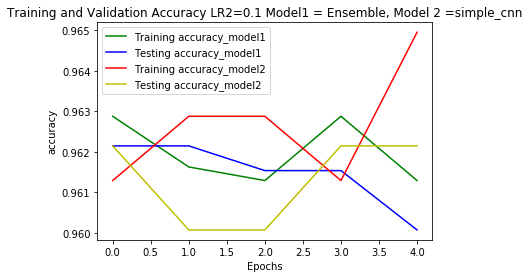

In [32]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_restul2]
accuracy_dev = [(d['textcat_a']) for d in dev_results2]
accuracy_test = [(d['textcat_a']) for d in test_result2]
accuracy_train1 = [(d['textcat_a']) for d in train_restul5]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results5]
accuracy_test1 = [(d['textcat_a']) for d in test_result5]
epochs = range(0,5)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy_model1')
#plt.plot(epochs, accuracy_dev, 'k', label='Validation accuracy_model1')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy_model1')
plt.plot(epochs, accuracy_train1, 'r', label='Training accuracy_model2')
#plt.plot(epochs, accuracy_dev1, 'c', label='Validation accuracy_model2')
plt.plot(epochs, accuracy_test1, 'y', label='Testing accuracy_model2')
plt.title('Training and Validation Accuracy LR2=0.1 Model1 = Ensemble, Model 2 =simple_cnn')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

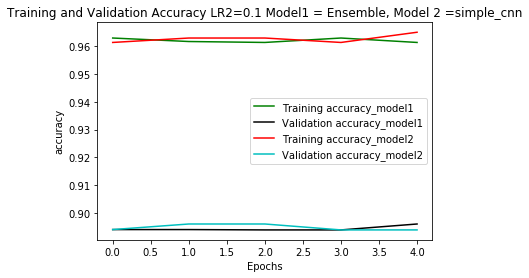

In [30]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_restul2]
accuracy_dev = [(d['textcat_a']) for d in dev_results2]
accuracy_test = [(d['textcat_a']) for d in test_result2]
accuracy_train1 = [(d['textcat_a']) for d in train_restul5]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results5]
accuracy_test1 = [(d['textcat_a']) for d in test_result5]
epochs = range(0,5)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy_model1')
plt.plot(epochs, accuracy_dev, 'k', label='Validation accuracy_model1')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy_model1')
plt.plot(epochs, accuracy_train1, 'r', label='Training accuracy_model2')
plt.plot(epochs, accuracy_dev1, 'c', label='Validation accuracy_model2')
plt.plot(epochs, accuracy_test1, 'y', label='Testing accuracy_model2')
plt.title('Training and Validation Accuracy LR2=0.1 Model1 = Ensemble, Model 2 =simple_cnn')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

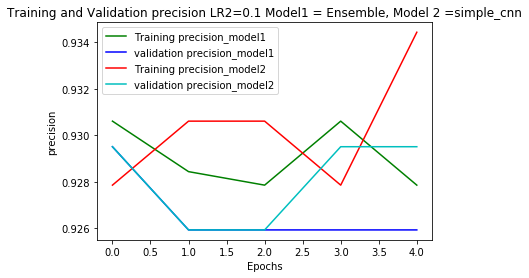

In [21]:
import matplotlib.pyplot as plt

precision_train = [(d['textcat_p']) for d in train_restul2]
precision_val = [(d['textcat_p']) for d in test_result2]
precision_train1 = [(d['textcat_p']) for d in train_restul5]
precision_val1 = [(d['textcat_p']) for d in test_result5]
epochs = range(0,5)
plt.plot(epochs, precision_train, 'g', label='Training precision_model1')
plt.plot(epochs, precision_val, 'b', label='validation precision_model1')
plt.plot(epochs, precision_train1, 'r', label='Training precision_model2')
plt.plot(epochs, precision_val1, 'c', label='validation precision_model2')
plt.title('Training and Validation precision LR2=0.1 Model1 = Ensemble, Model 2 =simple_cnn')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [ ]:
# Testing the model = https://en.wikipedia.org/wiki/Pictorial_map
test_text= "Such positions also allowed him to play a central role in training the militia forces who repelled the Bay of Pigs Invasion and bringing the Soviet nuclear-armed ballistic missiles to Cuba which precipitated the 1962 Cuban Missile Crisis "
doc=nlp(test_text)
doc.cats

In [ ]:
# Testing the model
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. As the need for geographical accuracy increased, these illustrations gradually slipped off the map and onto the borders and eventually disappeared altogether in the wake of modern scientific cartography."
doc=nlp(test_text)
doc.cats

In [ ]:
#positive sentence 

test_text = 'The leading panoramic map artists in the U.S.A. were Herman Brosius, Camille N. Drie, Thaddeus Mortimer Fowler, Paul Giraud, Augustus Koch, D. D. Morse, Henry Welge, and A. L. Westyard.'
doc=nlp(test_text)
doc.cats